In [1]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/房價_201010row_outlier_final_KDEclass.csv')
plt.rcParams['font.family'] = 'Heiti TC'

In [3]:
df.shape

(201010, 58)

In [4]:
df.describe()

,建築完成年月,建物移轉總面積平方公尺,有無管理組織,總價元,單價元平方公尺,緯度,經度,bad_count,good_count,陽台有無,...,建築完成年,交易年_民國,屋齡,good_count_0_500,good_count_500_1000,good_count_1000_1500,bad_count_0_500,bad_count_500_1000,bad_count_1000_1500,KDE_class
count,1.731990e+05,201010.000000,201010.000000,2.010100e+05,201010.000000,201010.000000,201010.000000,201010.000000,201010.000000,201010.000000,...,201010.000000,201010.000000,201010.000000,201010.000000,201010.000000,201010.000000,201010.000000,201010.000000,201010.000000,201010.000000
mean,9.536955e+05,167.163697,0.423765,9.255627e+06,56310.673824,23.043391,120.234813,4.577837,0.852848,0.761400,...,82.114751,107.693194,25.578444,0.946744,2.385797,3.582349,5.061554,13.076852,20.774703,1.896856
std,1.511770e+05,265.947367,0.494155,1.181899e+07,23478.266091,0.099644,0.079870,6.314229,1.308961,0.426229,...,35.773050,3.455129,36.912686,1.327739,2.735231,4.175769,6.345606,12.993476,20.844643,0.807584
min,0.000000e+00,0.860000,0.000000,3.500000e+04,16550.000000,22.503404,120.054968,0.000000,0.000000,0.000000,...,0.000000,101.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,8.309140e+05,114.330000,0.000000,5.220000e+06,38860.000000,22.985381,120.194986,1.000000,0.000000,1.000000,...,76.000000,105.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,8.000000,1.000000
50%,1.020522e+06,152.530000,0.000000,7.680000e+06,51959.000000,23.015778,120.229485,4.000000,0.000000,1.000000,...,95.000000,108.000000,11.000000,1.000000,2.000000,2.000000,4.000000,11.000000,16.000000,2.000000
75%,1.080924e+06,190.410000,1.000000,1.120000e+07,70513.000000,23.068184,120.262734,6.000000,1.000000,1.000000,...,107.000000,110.000000,31.000000,1.000000,4.000000,5.000000,7.000000,17.000000,25.000000,3.000000
max,1.130717e+06,57128.460000,1.000000,2.100000e+09,121643.000000,35.676423,139.650027,100.000000,10.000000,1.000000,...,113.000000,113.000000,113.000000,10.000000,18.000000,27.000000,101.000000,108.000000,156.000000,3.000000


In [5]:
pd.set_option('display.max_rows', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201010 entries, 0 to 201009
Data columns (total 58 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  201010 non-null  object 
 1   土地位置建物門牌              201010 non-null  object 
 2   交易年月日                 201010 non-null  object 
 3   建築完成年月                173199 non-null  float64
 4   建物移轉總面積平方公尺           201010 non-null  float64
 5   有無管理組織                201010 non-null  int64  
 6   總價元                   201010 non-null  int64  
 7   單價元平方公尺               201010 non-null  float64
 8   備註                    53145 non-null   object 
 9   編號                    201010 non-null  object 
 10  緯度                    201010 non-null  float64
 11  經度                    201010 non-null  float64
 12  bad_count             201010 non-null  float64
 13  good_count            201010 non-null  float64
 14  建築型態清整                201010 non-null  object 
 15  

In [6]:
print(df['有無管理組織'].unique())



# # 將 '有' 轉換為 1，'無' 轉換為 0，並處理 NaN 值
df['有無管理組織'] = df['有無管理組織'].map({'有': 1, '無': 0}).fillna(0)

# # 檢查轉換後的結果
print(df['有無管理組織'].head())


[0 1]
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 有無管理組織, dtype: float64


In [7]:
# df.info()

In [8]:
df.isnull().sum()

鄉鎮市區                         0
土地位置建物門牌                     0
交易年月日                        0
建築完成年月                   27811
建物移轉總面積平方公尺                  0
有無管理組織                       0
總價元                          0
單價元平方公尺                      0
備註                      147865
編號                           0
緯度                           0
經度                           0
bad_count                    0
good_count                   0
建築型態清整                       0
陽台有無                         0
是否含額外土地                      0
建築型態_住商大樓                    0
建築型態_公寓                      0
建築型態_其他                      0
建築型態_透天厝                     0
房地總價元                        0
格局比例_房                       0
格局比例_廳                       0
格局比例_衛                       0
格局比例_隔間                      0
是否包含車位                       0
建材_磚石                        0
建材_鋼筋                        0
建材_鋼骨                        0
建材_竹木                        0
住                            0
商       

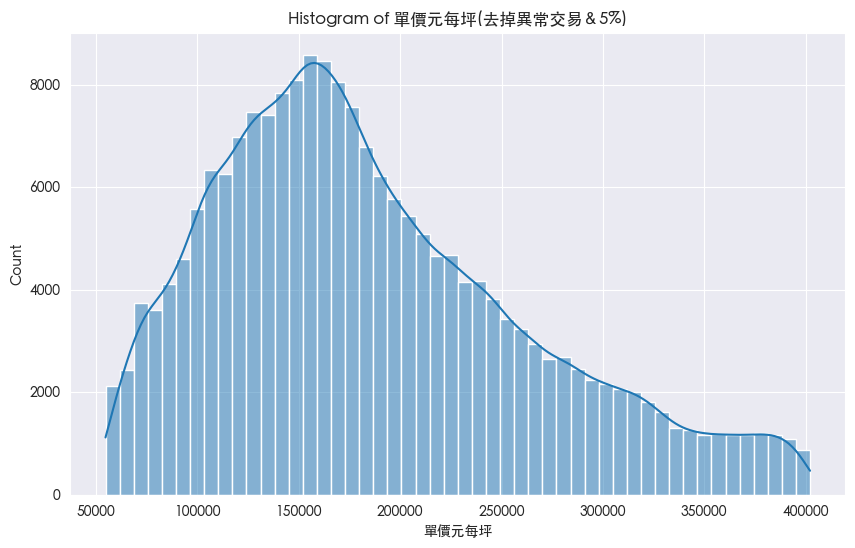

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單價元每坪(去掉異常交易＆5%)')


# 儲存圖檔，指定輸出路徑和檔名
output_path = "/Users/debbie/house/output/out-outlier-final_Histogram of 單價元每坪.png"
plt.savefig(output_path, dpi=300)
plt.show()

1. 處理異常值（outliers）：

    min 為 0，這可能是異常數據，應考慮刪除或補充這些數據。
    max 值高達 70,565,880，這可能也是極端值。可以使用四分位距數據（如 Q1 和 Q3）來計算並排除異常值：
    使用 IQR（Q3 - Q1），範圍外的數據可以被視為異常值，通常為低於 Q1 - 1.5*IQR 或高於 Q3 + 1.5*IQR 的數據。
2. 處理零值：

    如果 min 為 0 是無效數據，可以考慮將這些值濾除或使用平均值、中位數等進行填補。
3. 資料分佈檢查與轉換：

    檢查數據的偏態（skewness）。若數據呈現強烈的右偏分佈（偏態值 > 1），可以考慮對 y 進行對數變換（log transformation），如 log(y + 1)，以減少異常高值的影響，使數據分佈更加正態，從而提升模型的效果。
4. 標準化（Normalization）或正規化（Normalization）：

    若使用對數變換，對於 y 這樣的目標變數通常無需進行標準化。但在進行一些模型（如正則化模型）時，標準化有時能幫助收斂速度更快。

In [10]:
print(df['單價元每坪'].describe())

count    201010.000000
mean     186150.980866
std       77614.099869
min       54710.741750
25%      128462.805100
50%      171765.282815
75%      233100.817705
max      402125.604755
Name: 單價元每坪, dtype: float64


### 偏態值為 0.69

In [11]:
from scipy.stats import skew
# 計算 [單價元每坪] 欄位的偏態
skewness = skew(df['單價元每坪'].dropna())  # 避免 NaN 影響偏態計算
print(f"[單價元每坪] 欄位的偏態: {skewness}")

[單價元每坪] 欄位的偏態: 0.6839898672237217


In [12]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間', 'good_count_0_500', 'good_count_500_1000',
       'good_count_1000_1500', 'bad_count_0_500', 'bad_count_500_1000',
       'bad_count_1000_1500', 'KDE_class'],
      dtype='object')

## 分類欄位
- 建築型態：'建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝'
- 格局比例：'格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間'（佔比）
- 建材：'建材_磚石','建材_鋼筋', '建材_鋼骨', '建材_竹木'
- 土地用途：'住', '商', '工', '農'
- 移轉層次：'移轉層次_騎樓', '移轉層次_屋頂','移轉層次_一二樓'
- 屋齡：'屋齡區間'
- 好物設施：'good_count_0_500', 'good_count_500_1000','good_count_1000_1500', 'bad_count_0_500', 'bad_count_500_1000','bad_count_1000_1500'
## 有無欄位
- '有無管理組織'
- '陽台有無'
- '是否含額外土地'
- '是否包含車位'
- '有無電梯'
## 其他
- '交易年份
- ~'屋齡'~
- '房地總價元(坪)'
- '建物移轉總面積坪'

In [13]:
# 查看這些欄位的統計描述
print(df[['格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間']].describe())


              格局比例_房         格局比例_廳         格局比例_衛        格局比例_隔間
count  201010.000000  201010.000000  201010.000000  201010.000000
mean        0.376966       0.225691       0.280476       0.116779
std         0.050960       0.055404       0.062064       0.026168
min         0.250000       0.083333       0.166667       0.066667
25%         0.333333       0.181818       0.250000       0.090909
50%         0.375000       0.230769       0.272727       0.125000
75%         0.400000       0.250000       0.307692       0.125000
max         0.500000       0.333333       0.444444       0.166667


In [14]:
df['比例總和'] = df['格局比例_房'] + df['格局比例_廳'] + df['格局比例_衛'] + df['格局比例_隔間']
print(df['比例總和'].describe())


count    201010.000000
mean          0.999912
std           0.000660
min           0.994949
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: 比例總和, dtype: float64


In [15]:
# 創建一個函數，根據 One-Hot 編碼欄位的值返回類別標籤
def get_building_type(row):
    if row['移轉層次_騎樓'] == 1:
        return '騎樓'
    elif row['移轉層次_屋頂'] == 1:
        return '屋頂'
    elif row['移轉層次_一二樓'] == 1:
        return '一二樓'
    else:
        return '未知'

# 應用函數，創建新的類別型欄位
df['移轉層次'] = df.apply(get_building_type, axis=1)



In [16]:
# 創建一個函數，根據 One-Hot 編碼欄位的值返回類別標籤
def get_building_type(row):
    if row['建築型態_住商大樓'] == 1:
        return '住商大樓'
    elif row['建築型態_公寓'] == 1:
        return '公寓'
    elif row['建築型態_透天厝'] == 1:
        return '透天厝'
    elif row['建築型態_其他'] == 1:
        return '其他'
    else:
        return '未知'

# 應用函數，創建新的類別型欄位
df['建築型態'] = df.apply(get_building_type, axis=1)



In [17]:
# 定義函數，根據 One-Hot 編碼欄位返回建材類別
def get_material_type(row):
    if row['建材_磚石'] == 1:
        return '磚石'
    elif row['建材_鋼筋'] == 1:
        return '鋼筋'
    elif row['建材_鋼骨'] == 1:
        return '鋼骨'
    elif row['建材_竹木'] == 1:
        return '竹木'
    else:
        return '未知'  # 處理可能的缺失值或異常值

# 應用函數，創建新的類別型欄位
df['建材種類'] = df.apply(get_material_type, axis=1)



In [18]:
# 定義函數，根據 One-Hot 編碼欄位返回土地用途類別
def get_land_use_type(row):
    if row['住'] == 1:
        return '住'
    elif row['商'] == 1:
        return '商'
    elif row['工'] == 1:
        return '工'
    elif row['農'] == 1:
        return '農'
    else:
        return '未知'  # 處理可能的缺失值或異常值

# 應用函數，創建新的類別型欄位
df['土地用途'] = df.apply(get_land_use_type, axis=1)




In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 定義需要比較的分類變數
# categorical_vars = [
#     '建築型態', '土地用途','建材種類','移轉層次','屋齡區間','有無管理組織', '有無電梯', '是否包含車位', '是否含額外土地','陽台有無'
# ]

# output_path = "/Users/debbie/house/output/"

# # 遍歷每個分類變數，繪製對應的 Boxplot
# for var in categorical_vars:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(data=df, x=var, y='單價元每坪')
#     plt.title(f'單價元每坪 vs {var}')
#     plt.xlabel(var)
#     plt.ylabel('單價元每坪')
#     plt.xticks(rotation=45)  # 如果分類變數有多個類別，可以選擇旋轉 x 軸標籤
#     plt.tight_layout()
    
#         # 儲存圖檔，先儲存再顯示
#     plt.savefig(f"{output_path}out-outlier-final_{var}_regplot.png", dpi=300)
#     plt.show()
#     plt.close()  # 關閉圖形以避免記憶體佔用
    



In [20]:
value = df['建材種類'].unique()
value

array(['磚石', '鋼骨', '鋼筋', '未知', '竹木'], dtype=object)

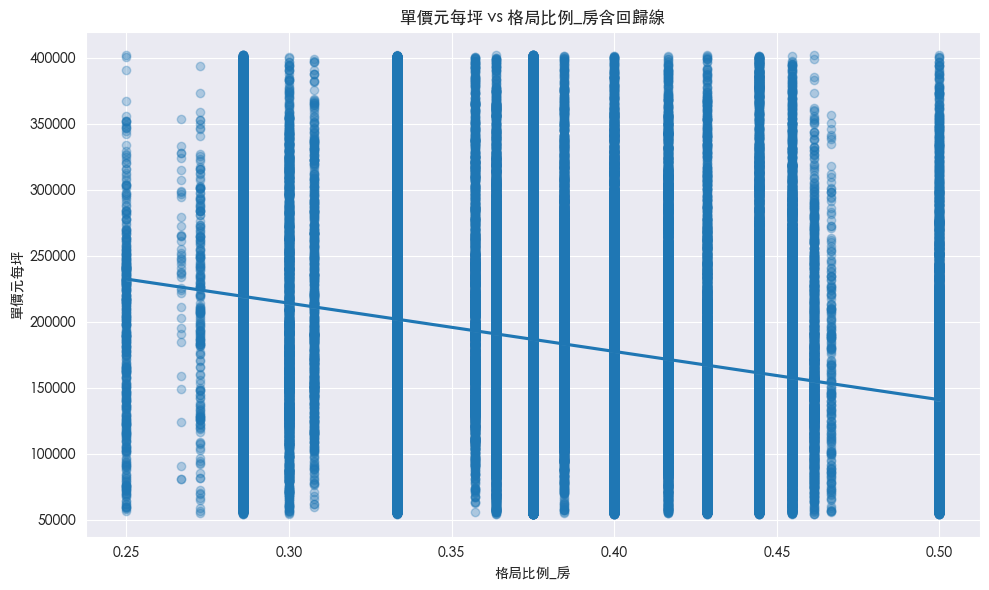

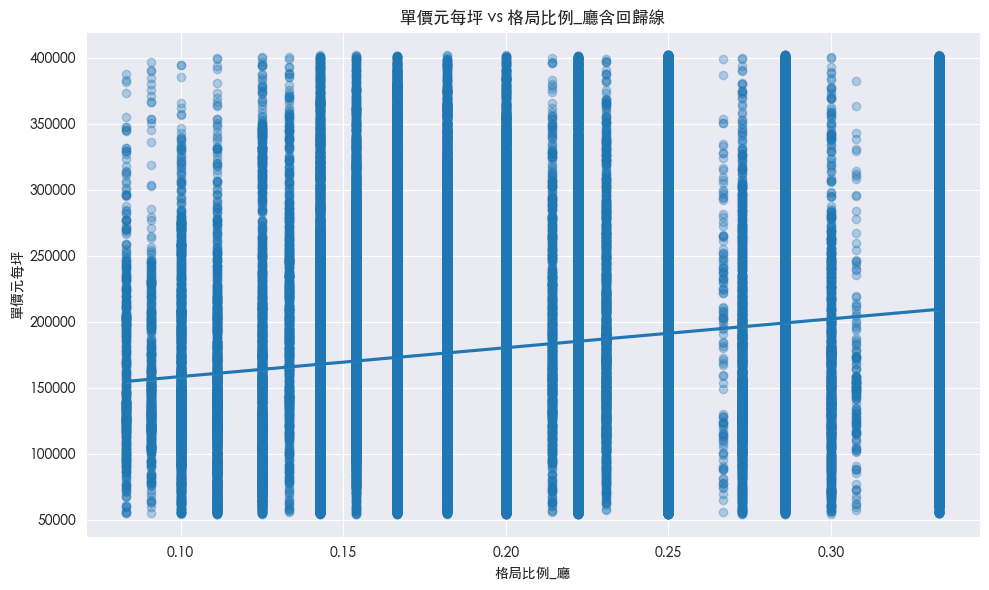

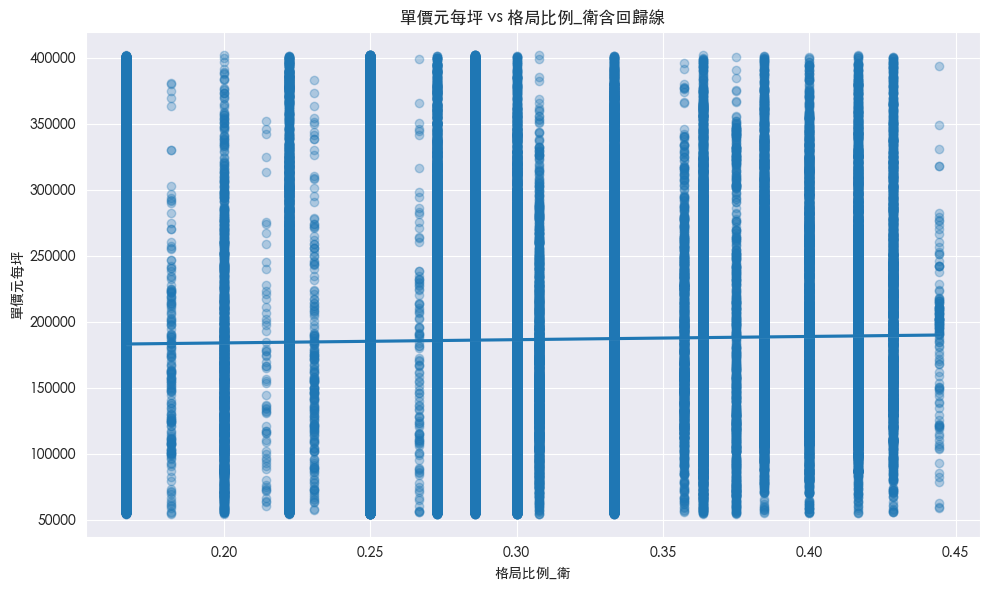

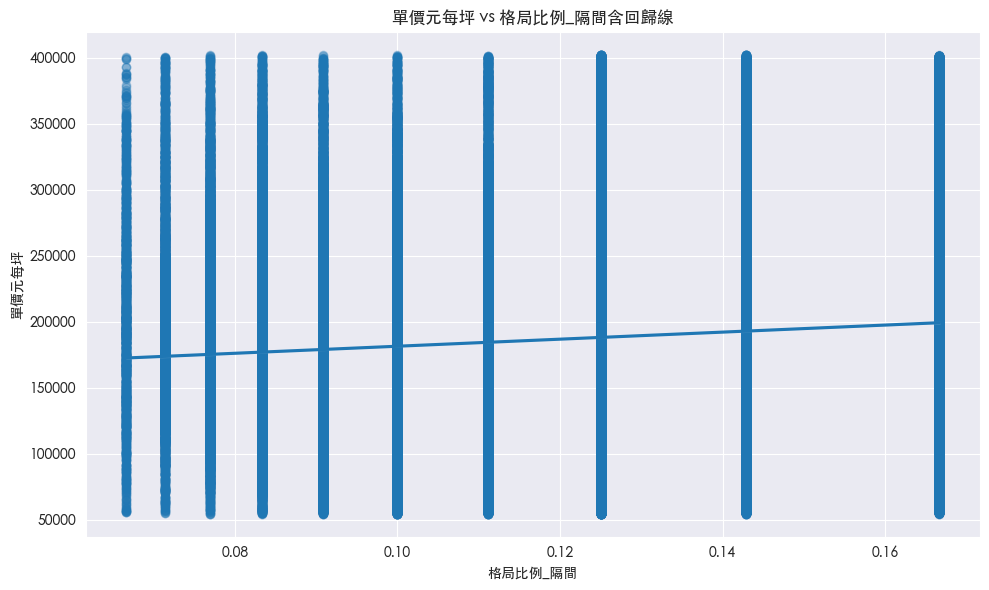

In [21]:

# 定义需要绘制的数值变量
numerical_vars = ['格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間']

# # 数据类型转换
# df[numerical_vars] = df[numerical_vars].astype(float)
# df['單價元每坪'] = df['單價元每坪'].astype(float)

# # 删除缺失值
# df_clean = df.dropna(subset=numerical_vars + ['單價元每坪'])

# 遍历每个数值变量，绘制对应的回归图
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x=var, y='單價元每坪', scatter_kws={'alpha':0.3})
    plt.title(f'單價元每坪 vs {var}含回歸線')
    plt.xlabel(var)
    plt.ylabel('單價元每坪')
    plt.grid(True)
    plt.tight_layout()
        # 儲存圖檔，先儲存再顯示
    plt.savefig(f"{output_path}out-outlier-final_{var}_regplot.png", dpi=300)
    plt.show()
    plt.close()  # 關閉圖形以避免記憶體佔用



In [22]:
yearly_avg_price = df.groupby('交易年份')['單價元每坪'].mean().reset_index()
yearly_avg_price 

,交易年份,單價元每坪
0,2012,118540.700922
1,2013,125354.668717
2,2014,138361.725209
3,2015,141012.025757
4,2016,147258.979863
5,2017,153129.804103
6,2018,159578.895892
7,2019,168407.928538
8,2020,187963.243723
9,2021,208805.675767


1. 過濾極端值： 可以在繪圖之前過濾掉一些過高或過低的個別交易價格，比如使用百分位數過濾。

2. 調整y軸縮放： 在 plt.yscale('log') 中使用對數尺度，以便更直觀地觀察數據變化。

3. 檢查平均值計算： 確認年度平均單價的計算方法，確保是基於合理範圍內的數據進行平均。

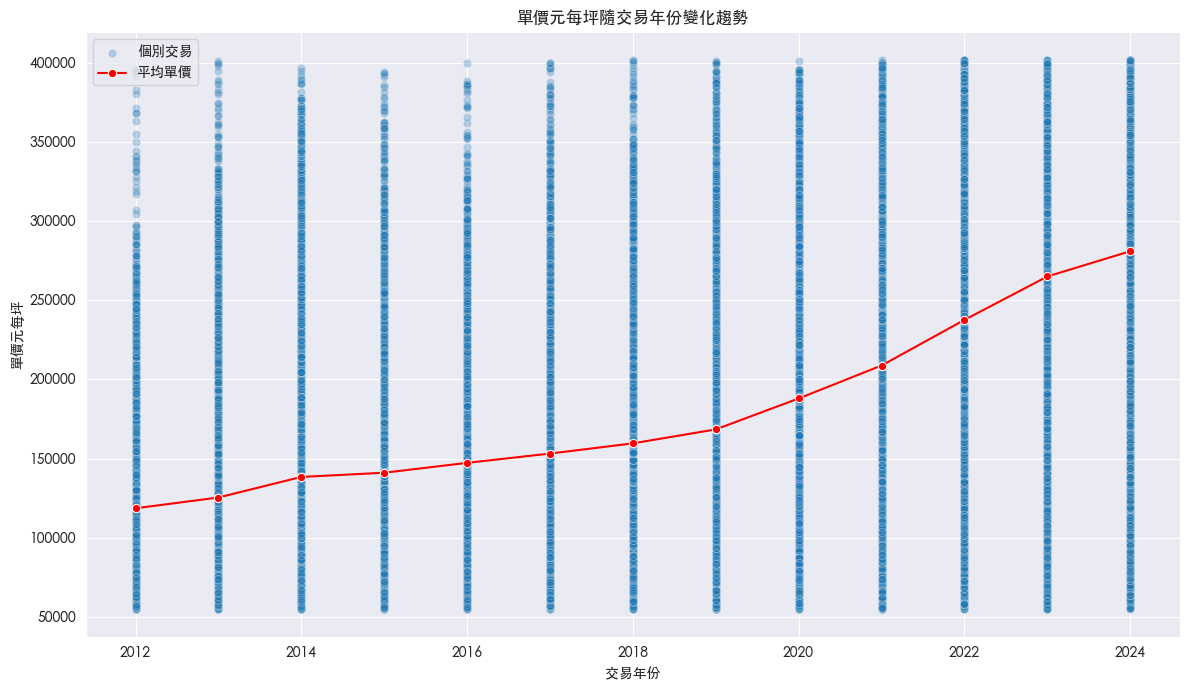

In [23]:
yearly_avg_price = df.groupby('交易年份')['單價元每坪'].mean().reset_index()
plt.figure(figsize=(12, 7))

# 绘制散点图
sns.scatterplot(data=df, x='交易年份', y='單價元每坪', alpha=0.3, label='個別交易')

# 绘制年度平均单价的折线图
sns.lineplot(data=yearly_avg_price, x='交易年份', y='單價元每坪', marker='o', color='red', label='平均單價')

plt.title('單價元每坪隨交易年份變化趨勢')
plt.xlabel('交易年份')
plt.ylabel('單價元每坪')
plt.legend()
plt.grid(True)
plt.tight_layout()

# 儲存圖檔，指定輸出路徑和檔名
output_path = "/Users/debbie/house/output/out-outlier-final_yearly_avg_price_trend.png"
plt.savefig(output_path, dpi=300)

plt.show()


<!-- # count_vars = [
#     'good_count_0_500', 'good_count_500_1000', 'good_count_1000_1500',
#     'bad_count_0_500', 'bad_count_500_1000', 'bad_count_1000_1500'
# ]


# for var in count_vars:
#     plt.figure(figsize=(10, 6))
#     sns.kdeplot(
#         data=df,
#         x=var,
#         y='單價元每坪',
#         cmap="Blues",
#         shade=True,
#         thresh=0.05
#     )
#     plt.title(f'單價元每坪 vs {var}（核密度图）')
#     plt.xlabel(var)
#     plt.ylabel('單價元每坪')
#     plt.tight_layout()
#     plt.show() -->

In [ ]:

# # 绘制散点图和回归线
# plt.figure(figsize=(10, 6))
# sns.regplot(
#     data=df,
#     x='good_count',
#     y='單價元每坪',
#     scatter_kws={'alpha': 0.5},
#     line_kws={'color': 'blue'},
#     label='好物設施'
# )
# sns.regplot(
#     data=df,
#     x='bad_count',
#     y='單價元每坪',
#     scatter_kws={'alpha': 0.5},
#     line_kws={'color': 'red'},
#     label='壞物設施'
# )
# plt.title('單價元每坪 vs 好物/壞物設施總計數（含回歸線）')
# plt.xlabel('設施總計數')
# plt.ylabel('單價元每坪')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

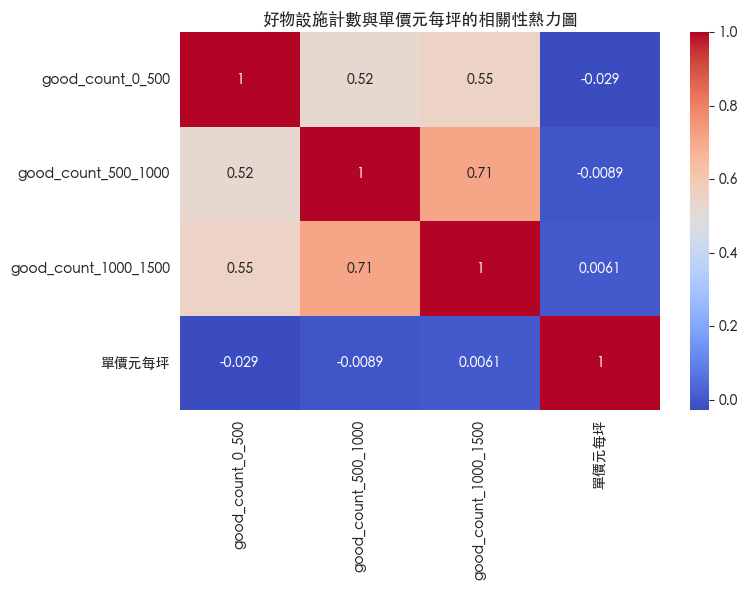

In [25]:
# 选择需要绘制的变量
heatmap_vars = ['good_count_0_500', 'good_count_500_1000', 'good_count_1000_1500', '單價元每坪']

# 计算相关性矩阵
corr = df[heatmap_vars].corr()

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('好物設施計數與單價元每坪的相關性熱力圖')
plt.tight_layout()
plt.show()

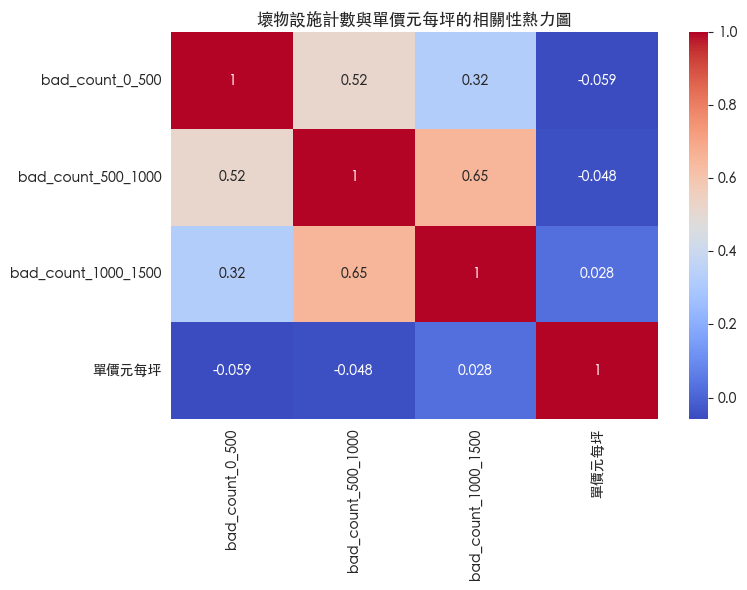

In [26]:
# 选择需要绘制的变量
heatmap_vars = ['bad_count_0_500', 'bad_count_500_1000', 'bad_count_1000_1500', '單價元每坪']

# 计算相关性矩阵
corr = df[heatmap_vars].corr()

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('壞物設施計數與單價元每坪的相關性熱力圖')
plt.tight_layout()
plt.show()

In [27]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間', 'good_count_0_500', 'good_count_500_1000',
       'good_count_1000_1500', 'bad_count_0_500', 'bad_count_500_1000',
       'bad_count_1000_1500', 'KDE_class', '比例總和', '移轉層次', '建築型態', '建材種類',
       '土地用途'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201010 entries, 0 to 201009
Data columns (total 63 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  201010 non-null  object 
 1   土地位置建物門牌              201010 non-null  object 
 2   交易年月日                 201010 non-null  object 
 3   建築完成年月                173199 non-null  float64
 4   建物移轉總面積平方公尺           201010 non-null  float64
 5   有無管理組織                201010 non-null  float64
 6   總價元                   201010 non-null  int64  
 7   單價元平方公尺               201010 non-null  float64
 8   備註                    53145 non-null   object 
 9   編號                    201010 non-null  object 
 10  緯度                    201010 non-null  float64
 11  經度                    201010 non-null  float64
 12  bad_count             201010 non-null  float64
 13  good_count            201010 non-null  float64
 14  建築型態清整                201010 non-null  object 
 15  

## Lasso 和 Ridge 回歸：
- 需要特徵縮放：這兩種回歸方法對變數的尺度敏感，因為正則化項會受到特徵值大小的影響。特徵縮放有助於模型更快收斂，並確保正則化項對各變數的影響一致。
- 需要對類別型變數進行編碼：一般使用 One-Hot Encoding，並避免對編碼後的變數進行標準化。
- 需要處理缺失值：這些模型不能接受缺失值，需要在建模前對缺失值進行填補或刪除。


In [29]:
from sklearn.preprocessing import StandardScaler
# 定義目標變數 y
y = df['單價元每坪']

# 定義特徵變數 X，排除目標變數和不必要的欄位
X = df.drop(columns=['單價元每坪', '編號', '備註', '鄉鎮市區', '土地位置建物門牌', '交易年月日',
                     '建築完成年月', '建物移轉總面積平方公尺', 'Region', '緯度', '經度','單價元平方公尺','總價元',
                     '建築型態清整', '房地總價元', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km',
                     'Region', '交易年_民國', '移轉層次', '建築型態', '建材種類', '土地用途','屋齡區間'])

# 移除包含缺失值的列
X = X.dropna()
y = y.loc[X.index]  # 確保 y 與 X 的索引對齊

# 如果有類別型變數需要處理，請在此處進行 One-Hot Encoding（依照之前的步驟）

# 劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# 列出數值型變數
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# 找出需要標準化的連續型變數（取值不只有 0 和 1）
continuous_cols = [col for col in numeric_cols if X[col].nunique() > 2]

# 初始化標準化器
scaler = StandardScaler()

# 在訓練集上擬合並轉換
X_train_scaled_continuous = scaler.fit_transform(X_train[continuous_cols])

# 在測試集上轉換
X_test_scaled_continuous = scaler.transform(X_test[continuous_cols])

# 將縮放後的資料轉換為 DataFrame
X_train_scaled_continuous = pd.DataFrame(X_train_scaled_continuous, columns=continuous_cols, index=X_train.index)
X_test_scaled_continuous = pd.DataFrame(X_test_scaled_continuous, columns=continuous_cols, index=X_test.index)

# 從原始資料中移除連續型變數，保留類別型變數（包括 One-Hot 編碼的變數）
X_train_categorical = X_train.drop(columns=continuous_cols)
X_test_categorical = X_test.drop(columns=continuous_cols)

# 合併標準化後的連續型變數和未經標準化的類別型變數
X_train_scaled = pd.concat([X_train_scaled_continuous, X_train_categorical], axis=1)
X_test_scaled = pd.concat([X_test_scaled_continuous, X_test_categorical], axis=1)

# 現在可以使用 X_train_scaled 和 y_train 進行模型訓練


In [30]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# 初始化模型
lasso = Lasso(alpha=1.0)
ridge = Ridge(alpha=1.0)

# 訓練模型
lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)

# 預測
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)

# 評估模型
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Lasso 回歸的均方誤差：{mse_lasso}")
print(f"Ridge 回歸的均方誤差：{mse_ridge}")


Lasso 回歸的均方誤差：2078936390.8152778
Ridge 回歸的均方誤差：2078858390.8632722


In [31]:
from sklearn.model_selection import GridSearchCV

# 使用 GridSearchCV 來尋找最佳的 alpha 值
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"最佳的 alpha: {grid_search.best_params_['alpha']}")
print(f"最佳模型的 R2_score (train): {grid_search.best_score_}")

# 使用最佳參數重新訓練模型
best_alpha = grid_search.best_params_['alpha']
ridgeReg = Ridge(alpha=best_alpha)
ridgeReg.fit(X_train, y_train)


最佳的 alpha: 0.01
最佳模型的 R2_score (train): 0.6395349805013011


Ridge(alpha=0.01)

In [32]:
# 實例化 Ridge 模型，這裡的 alpha 是正則化強度，可以根據需要調整
ridgeReg = Ridge(alpha=0.01)

# 訓練 Ridge 模型
ridgeReg.fit(X_train, y_train)


Ridge(alpha=0.01)

In [33]:
# 預測訓練集和測試集
y_pred_ridge_train = ridgeReg.predict(X_train)
y_pred_ridge_test = ridgeReg.predict(X_test)
# 計算 R2（決定係數）和 RMSE（均方根誤差）
r2_score_ridge_train = ridgeReg.score(X_train, y_train)
r2_score_ridge_test = ridgeReg.score(X_test, y_test)

rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))

# 打印結果
print(f"R2_score (train): {r2_score_ridge_train}")
print(f"R2_score (test): {r2_score_ridge_test}")
print(f"RMSE (train): {rmse_ridge_train}")
print(f"RMSE (test): {rmse_ridge_test}")


R2_score (train): 0.6641627965967779
R2_score (test): 0.655781716896584
RMSE (train): 44953.97398429872
RMSE (test): 45593.748008965864


## LinearRegression

In [34]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [35]:
from sklearn.metrics import r2_score

# R2 score，即決定係數，反映Y的全部變異能通過迴歸關係被所有X解釋的比例。
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# RMSE一般指均方根誤差(標準誤差)，可衡量預測值和實際值之間的平均差異，藉此估計預測模型預測目標值的準確度
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_linear_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_train)
print("RMSE: ", rmse_test)

R2_score (train):  0.6641641301886407
R2_score (test):  0.6557715523219706
RMSE:  44953.88472927752
RMSE:  45594.42118301712


## 隨機森林
- 不需要特徵縮放：隨機森林是基於決策樹的模型，決策樹通過對特徵進行分割來做決策，對變數的尺度不敏感。因此，對數值型變數進行標準化或歸一化通常不是必須的。
- 可以直接處理類別型變數：如果使用能夠處理類別型變數的實現（如某些 Python 的隨機森林套件），可以直接使用 Label Encoding。
- One-Hot Encoding 的影響：雖然隨機森林可以處理 One-Hot 編碼的變數，但過多的 One-Hot 編碼變數可能會增加模型的複雜度，影響性能。
可以部分處理缺失值：某些隨機森林實現可以處理缺失值，但為了提高模型性能，建議仍然對缺失值進行處理。

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201010 entries, 0 to 201009
Data columns (total 63 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  201010 non-null  object 
 1   土地位置建物門牌              201010 non-null  object 
 2   交易年月日                 201010 non-null  object 
 3   建築完成年月                173199 non-null  float64
 4   建物移轉總面積平方公尺           201010 non-null  float64
 5   有無管理組織                201010 non-null  float64
 6   總價元                   201010 non-null  int64  
 7   單價元平方公尺               201010 non-null  float64
 8   備註                    53145 non-null   object 
 9   編號                    201010 non-null  object 
 10  緯度                    201010 non-null  float64
 11  經度                    201010 non-null  float64
 12  bad_count             201010 non-null  float64
 13  good_count            201010 non-null  float64
 14  建築型態清整                201010 non-null  object 
 15  

In [43]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
# 定義目標變數 y
y = df['單價元每坪']

# 定義要移除的欄位
columns_to_drop = [
    '單價元每坪', '編號', '備註', '鄉鎮市區', '土地位置建物門牌', '交易年月日',
    '建築完成年月', '建物移轉總面積平方公尺', 'Region', '緯度', '經度',
    '建築型態清整', '房地總價元', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km',
    '交易年_民國', '單價元平方公尺','總價元',
    # 已經 One-Hot 編碼且類別型態為 object 的欄位
    '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
    '建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木',
    '住', '商', '工', '農','bad_count','good_count',
    '移轉層次_騎樓', '移轉層次_屋頂', '移轉層次_一二樓', '屋齡','房地總價元(坪)','建築完成年','交易年份'
]

# 定義特徵變數 X，移除目標變數和不必要的欄位
X = df.drop(columns=columns_to_drop)

# # 檢查缺失值
# print("缺失值統計：")
# print(X.isnull().sum())

# 移除包含缺失值的列
X = X.dropna()
y = y.loc[X.index]  # 確保 y 與 X 的索引對齊

# 找出類別型變數
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print("需要處理的類別型變數：", categorical_cols)

# 分離低基數和高基數的類別型變數
low_cardinality_cols = [col for col in categorical_cols if X[col].nunique() < 10]
high_cardinality_cols = [col for col in categorical_cols if X[col].nunique() >= 10]

print("低基數的類別型變數（使用 One-Hot Encoding）：", low_cardinality_cols)
print("高基數的類別型變數（使用 Label Encoding）：", high_cardinality_cols)

# 對低基數的類別型變數進行 One-Hot Encoding
X = pd.get_dummies(X, columns=low_cardinality_cols)

# 初始化 Label Encoder
label_encoder = LabelEncoder()

# 對高基數的類別型變數進行 Label Encoding
for col in high_cardinality_cols:
    X[col] = label_encoder.fit_transform(X[col])

# 劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# 初始化隨機森林模型
rf = RandomForestRegressor(n_estimators=100, random_state=25)

# 訓練模型
rf.fit(X_train, y_train)

# 預測
y_pred = rf.predict(X_test)

# 評估模型性能
mse = mean_squared_error(y_test, y_pred)
print(f"隨機森林模型的均方誤差（MSE）：{mse}")


需要處理的類別型變數： ['屋齡區間', '移轉層次', '建築型態', '建材種類', '土地用途']
低基數的類別型變數（使用 One-Hot Encoding）： ['屋齡區間', '移轉層次', '建築型態', '建材種類', '土地用途']
高基數的類別型變數（使用 Label Encoding）： []
隨機森林模型的均方誤差（MSE）：1506564472.3714764


Feature importance ranking
特徵重要性：
建物移轉總面積坪                0.111495
陽台有無                    0.107147
是否包含車位                  0.103913
bad_count_1000_1500     0.097015
bad_count_500_1000      0.066883
屋齡區間_未滿3年               0.059124
bad_count_0_500         0.053779
good_count_1000_1500    0.044770
good_count_500_1000     0.038187
KDE_class               0.035061
good_count_0_500        0.032645
屋齡區間_30年以上              0.030662
格局比例_房                  0.029060
屋齡區間_3年以上－未滿12年         0.028703
格局比例_衛                  0.025398
格局比例_廳                  0.017963
格局比例_隔間                 0.017848
建築型態_透天厝                0.015884
是否含額外土地                 0.011417
建材種類_鋼筋                 0.009743
建築型態_公寓                 0.006578
土地用途_商                  0.006504
土地用途_住                  0.006365
建材種類_未知                 0.006155
土地用途_未知                 0.005553
土地用途_農                  0.004861
屋齡區間_12年以上－未滿21年        0.004057
土地用途_工                  0.003838
屋齡區間_21年以上－未滿30年        0.003257
比例總和     

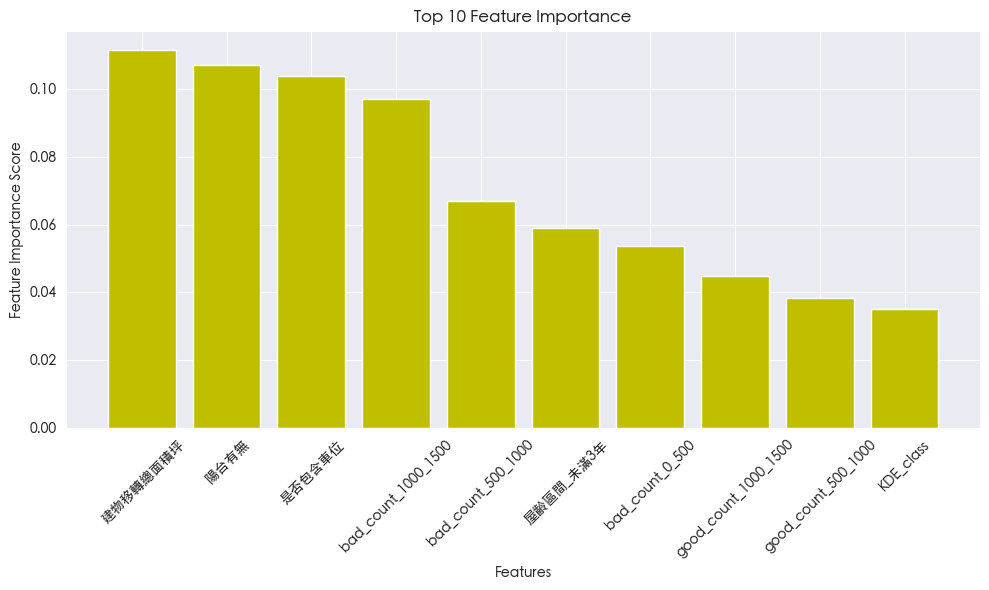

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# 確保已經訓練了隨機森林模型 rf

print('Feature importance ranking')

# 獲取特徵重要性
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# 按重要性排序
feature_importances.sort_values(ascending=False, inplace=True)

print("特徵重要性：")
print(feature_importances)

# 取出前 10 個特徵及其重要性
top_n = 10
top_features = feature_importances.index[:top_n]
top_importances = feature_importances.values[:top_n]

# 繪製前 10 個特徵的重要性圖
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importance')
plt.bar(top_features, top_importances, color='y', align='center')
plt.xticks(rotation=45)
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.tight_layout()
plt.show()


1. R2 Score
R2_score (train): 0.9998 和 R2_score (test): 0.9989 都非常接近 1。這表示你的隨機森林模型對訓練集和測試集的解釋能力都很高。具體來說，R2 分數接近 1 表示模型能夠解釋輸入變量與目標變量之間幾乎所有的變異性。
可能的問題：過高的 R2 分數（尤其是在訓練集和測試集都接近 1）可能表明模型有過擬合（overfitting）的風險。這意味著模型在訓練集上學得非常好，但在遇到新的數據時（測試集）可能會有較差的表現。雖然在這裡測試集的 R2 分數也很高，但仍需檢查是否存在過度擬合。
2. RMSE (Root Mean Squared Error)
RMSE (train): 1039.34 和 RMSE (test): 2498.52 分別代表模型在訓練集和測試集上的預測誤差的平方根。RMSE 是衡量模型預測值與真實值之間差距的指標，數值越小，表示預測結果越精準。
RMSE 解釋：
訓練集的 RMSE (1039.34) 顯著小於測試集的 RMSE (2498.52)，這意味著模型在訓練集上表現得比在測試集上更好。
雖然測試集的 RMSE 增加，但考慮到房價數據可能具有較大的數值範圍，這樣的 RMSE 增加或許可以接受，但仍需具體對比房價的範圍來評估 RMSE 的大小是否合理。
3. 綜合解釋
你的模型在訓練集和測試集上的 R2 分數都非常高，表示模型可以很好地擬合資料。然而，訓練集和測試集之間 RMSE 的差距（1039 vs. 2498）表明模型可能有些過度擬合，因為模型在訓練數據上預測得更精確。
建議：
可以嘗試進一步調整模型參數或進行交叉驗證，觀察是否能在測試集上降低 RMSE。
檢查特徵工程是否合理，避免過多使用能過度擬合數據的特徵。
進一步檢查測試集的數據分佈是否與訓練集一致，如果測試集具有不同的特徵分佈，可能需要更大範圍的資料集來進行模型訓練。
這樣的分析可以幫助你理解模型的性能和可能存在的問題，更好地進行模型的優化。

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

# 預測與評估
y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)

# 計算 R^2 分數
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# 計算 RMSE
rmse_rf_train = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
rmse_rf_test = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))

# 輸出結果
print(f"R2_score (train): {r2_score_rf_train}")
print(f"R2_score (test): {r2_score_rf_test}")
print(f"RMSE (train): {rmse_rf_train}")
print(f"RMSE (test): {rmse_rf_test}")


R2_score (train): 0.9488314841239097
R2_score (test): 0.7505341705454004
RMSE (train): 17547.089766203768
RMSE (test): 38814.48791844968
